---
title: "EDA - Playground Series Season 3, Episode 4"
description: "Tabular Classification with a Credit Card Fraud Dataset"
author: "Sagar Thacker"
date: "2023-01-30"
categories: [Kaggle]
image: ../images/credit-card-fraud-detection/money.jpeg
jupyter: python3
---


In [1]:
# | code-fold: true
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None
%matplotlib inline


## 1. Data Description

The dataset for this competition (both train and test) was generated from a deep learning model trained on the [Credit Card Fraud Detection](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud "Credit Card Fraud Detection dataset"). Feature distributions are close to, but not exactly the same, as the original.

We are given three files:

-   train.csv - the training dataset; Class is the target
-   test.csv - the test dataset; our objective is to predict Class
-   sample_submission.csv - a sample submission file in the correct format

Description of each column:

| Feature | Description                                                                                 |
| :------ | :------------------------------------------------------------------------------------------ |
| id      | Indentifier for unique rows                                                                 |
| Time    | Number of seconds elapsed between this transaction and the first transaction in the dataset |
| V1-V28  | Features generated from the original dataset                                                |
| Amount  | Transaction amount                                                                          |
| Class   | Target Feature: 1 for fraudulent transactions, 0 otherwise                                  |

: Feature Description {tbl-colwidths="[10,75]"}


## 2. Overview and Structure


In [2]:
__dirname = '../input/playground-series-s3e4/'

train = pd.read_csv(__dirname + 'train.csv')
test = pd.read_csv(__dirname + 'test.csv')


In [3]:
# Display top 5 rows of train set
train.head()


,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,0.742144,0.108782,-1.070243,-0.234910,-1.099360,0.502467,0.169318,0.065688,-0.306957,-0.323800,0.103348,-0.292969,-0.334701,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98,0
1,1,0.0,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,-0.109948,0.908773,0.836798,-0.056580,-0.120990,-0.144028,-0.039582,1.653057,-0.253599,-0.814354,0.716784,0.065717,0.054848,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.00,0
2,2,0.0,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,-0.042027,-0.818383,-0.376512,-0.226546,-0.552869,-0.886466,-0.180890,0.230286,0.590579,-0.321590,-0.433959,-0.021375,-0.326725,-0.803736,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,2.69,0
3,3,0.0,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,0.885838,-0.007527,0.637441,0.676960,-1.504823,0.554039,-0.824356,-0.527267,-0.095838,-0.312519,0.642659,-0.340089,-0.095514,-0.079792,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,1.00,0
4,4,0.0,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,0.692665,-0.097495,1.338869,1.391399,-0.128167,-0.081836,0.100548,-0.338937,0.090864,-0.423645,-0.731939,-0.203628,0.099157,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,1.00,0


### 2.1. Data Structure and Statistics


In [4]:
print(f"Training set has {train.shape[0]} rows and {train.shape[1]} columns")
print(f"Testing set has {test.shape[0]} rows and {test.shape[1]} columns")


Training set has 219129 rows and 32 columns
Testing set has 146087 rows and 31 columns


In [5]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219129 entries, 0 to 219128
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      219129 non-null  int64  
 1   Time    219129 non-null  float64
 2   V1      219129 non-null  float64
 3   V2      219129 non-null  float64
 4   V3      219129 non-null  float64
 5   V4      219129 non-null  float64
 6   V5      219129 non-null  float64
 7   V6      219129 non-null  float64
 8   V7      219129 non-null  float64
 9   V8      219129 non-null  float64
 10  V9      219129 non-null  float64
 11  V10     219129 non-null  float64
 12  V11     219129 non-null  float64
 13  V12     219129 non-null  float64
 14  V13     219129 non-null  float64
 15  V14     219129 non-null  float64
 16  V15     219129 non-null  float64
 17  V16     219129 non-null  float64
 18  V17     219129 non-null  float64
 19  V18     219129 non-null  float64
 20  V19     219129 non-null  float64
 21  V20     21

In [6]:
test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146087 entries, 0 to 146086
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      146087 non-null  int64  
 1   Time    146087 non-null  float64
 2   V1      146087 non-null  float64
 3   V2      146087 non-null  float64
 4   V3      146087 non-null  float64
 5   V4      146087 non-null  float64
 6   V5      146087 non-null  float64
 7   V6      146087 non-null  float64
 8   V7      146087 non-null  float64
 9   V8      146087 non-null  float64
 10  V9      146087 non-null  float64
 11  V10     146087 non-null  float64
 12  V11     146087 non-null  float64
 13  V12     146087 non-null  float64
 14  V13     146087 non-null  float64
 15  V14     146087 non-null  float64
 16  V15     146087 non-null  float64
 17  V16     146087 non-null  float64
 18  V17     146087 non-null  float64
 19  V18     146087 non-null  float64
 20  V19     146087 non-null  float64
 21  V20     14

We find:

-   All the columns in the both train and test set are either int64 or float64.
-   Based on the value for `Non-Null` we can observe we don't have any missing values in our datasets.
-   As categorical type features are not present, it reduces some pain points while data preprocessing.


In [7]:
train.describe()


,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000
mean,109564.000000,62377.415376,0.096008,0.048345,0.592102,0.069273,-0.161555,0.133688,-0.128224,0.149534,-0.048337,-0.039758,0.153632,-0.061038,0.014330,0.067649,0.108643,0.013650,0.036815,-0.033927,-0.008302,0.009708,-0.031064,-0.050852,-0.050531,-0.002992,0.124005,0.009881,0.014034,0.017313,66.359803,0.002140
std,63257.237906,25620.348569,1.395425,1.159805,1.132884,1.253125,1.069530,1.202411,0.817207,0.716212,1.054143,0.821889,0.976946,0.998470,1.039145,0.801335,0.891613,0.786654,0.691709,0.784454,0.739928,0.439521,0.422777,0.597812,0.318175,0.593100,0.406741,0.473867,0.233355,0.164859,150.795017,0.046214
min,0.000000,0.000000,-29.807725,-44.247914,-19.722872,-5.263650,-37.591259,-25.659750,-31.179799,-28.903442,-8.756951,-22.092656,-4.190145,-16.180165,-4.373778,-15.585021,-4.155728,-11.778839,-20.756768,-7.456060,-4.281628,-18.679066,-14.689621,-8.748979,-11.958588,-2.836285,-3.958591,-1.858672,-9.234767,-4.551680,0.000000,0.000000
25%,54782.000000,47933.000000,-0.846135,-0.573728,-0.027154,-0.769256,-0.847346,-0.631835,-0.646730,-0.095948,-0.711444,-0.499563,-0.576969,-0.476890,-0.671601,-0.329905,-0.461596,-0.461077,-0.406675,-0.496990,-0.463035,-0.167927,-0.190418,-0.473099,-0.174478,-0.332540,-0.126080,-0.318330,-0.050983,-0.009512,5.990000,0.000000
50%,109564.000000,63189.000000,0.385913,0.046937,0.735895,0.064856,-0.229929,-0.087778,-0.098970,0.111219,-0.131323,-0.106034,0.090545,0.087649,-0.016837,0.049266,0.178975,0.054550,-0.013949,-0.039451,-0.002935,-0.037702,-0.042858,-0.032856,-0.063307,0.038708,0.145934,-0.086388,0.015905,0.022163,21.900000,0.000000
75%,164346.000000,77519.000000,1.190661,0.814145,1.306110,0.919353,0.356856,0.482388,0.385567,0.390976,0.583715,0.403967,0.917392,0.608480,0.695547,0.460837,0.791255,0.531777,0.410978,0.446448,0.455718,0.126750,0.109187,0.354910,0.060221,0.394566,0.402926,0.253869,0.076814,0.066987,68.930000,0.000000
max,219128.000000,120580.000000,2.430494,16.068473,6.145578,12.547997,34.581260,16.233967,39.824099,18.270586,13.423914,15.878405,9.417789,5.406614,5.976265,6.078453,4.693323,5.834992,8.845303,4.847887,4.090974,15.407839,22.062945,6.163541,12.734391,4.572739,3.111624,3.402344,13.123618,23.263746,7475.000000,1.000000


In [8]:
test.describe()


,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,146087.000000,146087.000000,146087.000000,146087.000000,146087.000000,146087.000000,146087.000000,146087.000000,146087.000000,146087.000000,146087.000000,146087.000000,146087.000000,146087.000000,146087.000000,146087.000000,146087.000000,146087.000000,146087.000000,146087.000000,146087.000000,146087.000000,146087.000000,146087.000000,146087.000000,146087.000000,146087.000000,146087.000000,146087.000000,146087.000000,146087.000000
mean,292172.000000,144637.928166,0.512929,-0.013098,-0.697478,-0.273258,0.321856,-0.050204,0.073419,0.043803,-0.071620,0.013962,-0.249980,0.108453,-0.127648,-0.151857,-0.199467,0.027958,-0.052971,0.128470,-0.008261,-0.056678,0.044729,0.175461,0.018471,0.016029,-0.118352,-0.015199,0.006236,0.002035,66.182463
std,42171.828725,14258.025396,1.628455,1.247749,1.292522,1.365752,1.146215,1.332880,0.946681,0.749513,0.924996,0.932453,0.881086,0.686018,0.916833,0.832182,0.774293,0.811819,0.713056,0.798006,0.722225,0.458364,0.449017,0.710704,0.359597,0.633929,0.479720,0.446154,0.255935,0.174613,153.151535
min,219129.000000,120580.000000,-34.755944,-37.803827,-18.934952,-5.497560,-25.639591,-14.133040,-18.715915,-26.926164,-4.823352,-12.333747,-4.333619,-8.836286,-4.131766,-14.172557,-4.072435,-7.639810,-11.868164,-4.342548,-4.823554,-26.412867,-13.087263,-5.392649,-12.814296,-2.789084,-3.361564,-1.743223,-9.412538,-8.262339,0.000000
25%,255650.500000,132698.000000,-0.679988,-0.715885,-1.619268,-1.021205,-0.418547,-0.891441,-0.570042,-0.231824,-0.634695,-0.636147,-0.957520,-0.324639,-0.717325,-0.617641,-0.737472,-0.451743,-0.572054,-0.380886,-0.383668,-0.237529,-0.166715,-0.393667,-0.135059,-0.368957,-0.409938,-0.284914,-0.066037,-0.057447,5.990000
50%,292172.000000,144493.000000,0.285798,0.009058,-0.719060,-0.482945,0.306851,-0.372813,0.118545,0.014979,-0.075909,-0.065457,-0.182940,0.124780,-0.098396,-0.065481,-0.167537,0.076469,-0.123968,0.123625,-0.002966,-0.096729,0.058393,0.250169,0.017835,0.029727,-0.142325,-0.069342,-0.003539,-0.026955,21.790000
75%,328693.500000,156140.000000,1.974015,0.827420,0.073874,0.369725,0.955997,0.302724,0.734503,0.296969,0.513770,0.564146,0.453913,0.581384,0.504763,0.395024,0.305768,0.546893,0.372321,0.677771,0.374562,0.065753,0.244817,0.749555,0.167514,0.562138,0.182937,0.216632,0.069334,0.066954,66.000000
max,365215.000000,172790.000000,2.452901,12.390128,4.492640,11.232928,24.352818,16.596635,27.023955,12.098322,7.888980,14.735004,6.204939,5.107089,3.928334,7.869385,5.374923,5.570906,7.136535,3.758750,4.929496,15.829261,15.333546,5.771245,17.481609,4.541724,4.555960,3.374748,12.673968,13.093229,4630.600000


We find:

-   The feature names don't help us understand what the feature is about or how to interpret it.
-   For most of the features the minimum and maximum values are to different extremes whereas their 1st quatile, median, and 3rd quatile are close to each other.
    -   For example, `V1` has minimum value as -34.755944 and maximum value as 2.452901.
    -   `25%`: -0.679988, `50%`: 0.285798, and `75%`: 1.974015


### 2.2. Missing values


In [9]:
# Check for missing values in train set
print(f"Number of missing values in training set: {sum(train.isna().sum())}")
print(f"Number of missing values in testing set: {sum(test.isna().sum())}")


Number of missing values in training set: 0
Number of missing values in testing set: 0


We find:

-   As seen in the `info()` results we confirm we don't have any missing values in the both datasets.


## 3. Visualizations


In [10]:
# Extract the columns which contains 'V'
v_columns = [col for col in train.columns if col[0] == 'V']
useful_columns = [col for col in train.columns if col not in ['id', 'Time']]


### 3.1. Univariate Analysis


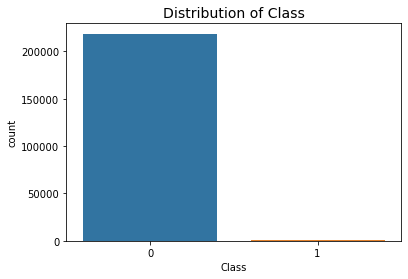

In [11]:
sns.countplot(x='Class', data=train)
plt.title('Distribution of Class', fontsize=14)
plt.show()


In [12]:
train.Class.value_counts() / train.shape[0] * 100


0    99.785971
1     0.214029
Name: Class, dtype: float64

We find:

-   The two classes are highly imbalanced.
-   ~99.78% of the data is labelled as Class 0
-   ~0.21% of the data is labelled as Class 1.


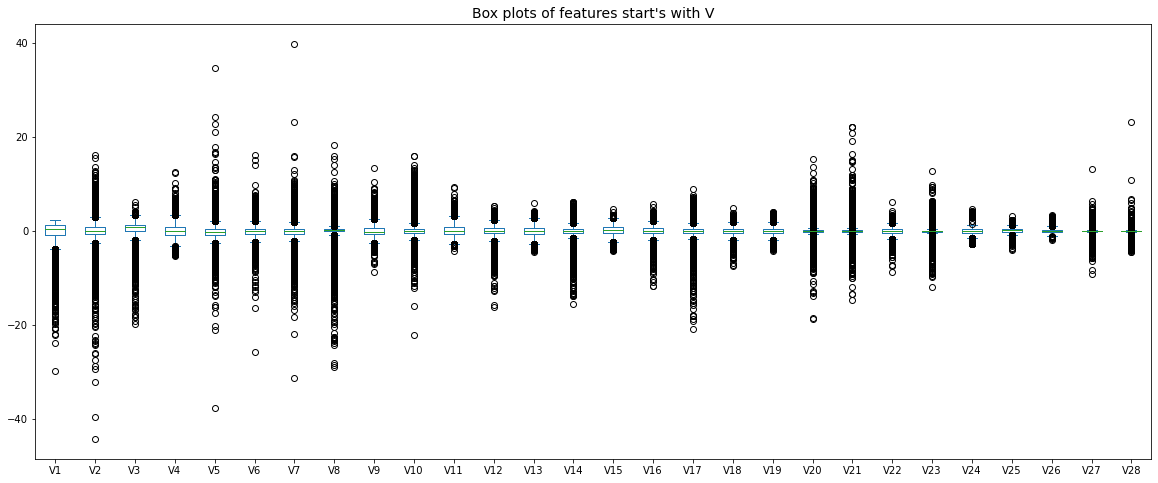

In [13]:
ax = train[v_columns].plot(kind='box', figsize=(20, 8))
plt.title('Box plots of features start\'s with V', fontsize=14)
plt.show()


We find:

-   Similar, to what we saw in the result from the `describe()` method, most of the data is centered around `0`.
-   Also, there are a lot of data points that appear to be outliers.
-   Few of the columns, for example, `V1` appear to be skewed.


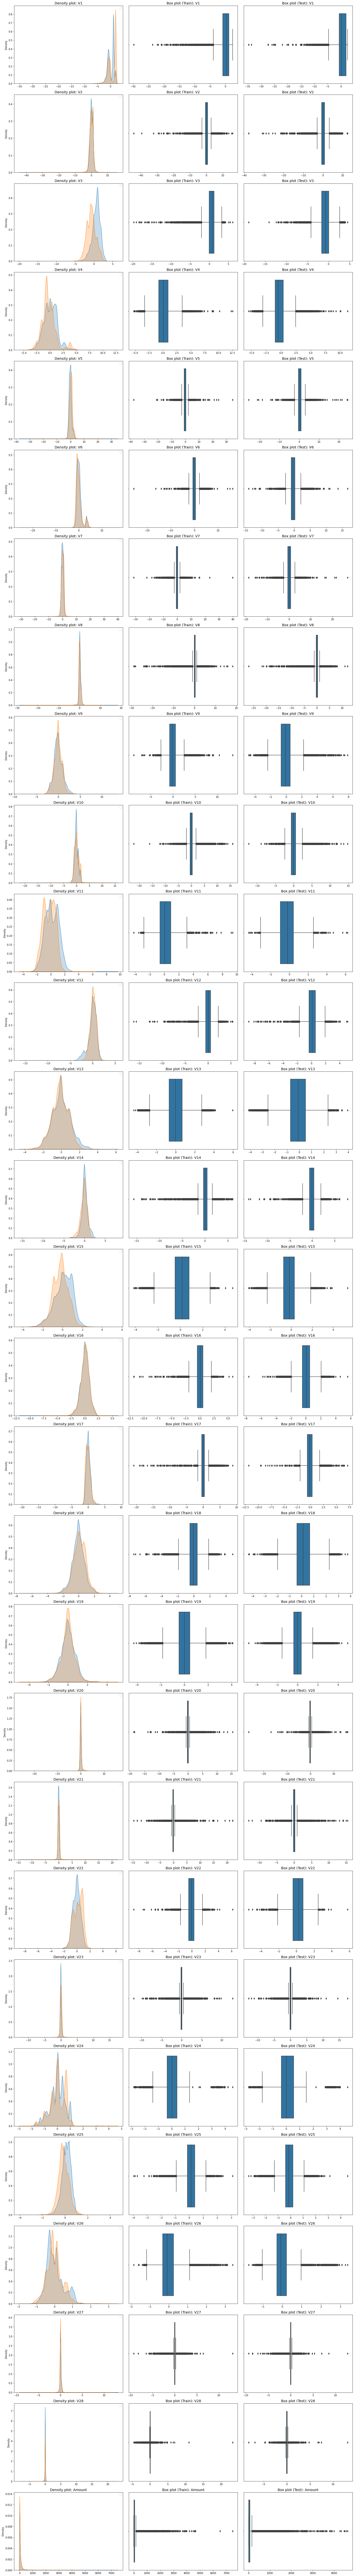

In [14]:
# Explore distribution of each feature for train and test sets.

fig, axes = plt.subplots(nrows=29, ncols=3, figsize=(20, 5*29))

for row, col in enumerate(v_columns + ['Amount']):
    sns.kdeplot(data=train, x=col, ax=axes[row, 0], fill=True)
    sns.kdeplot(data=test, x=col, ax=axes[row, 0], fill=True)
    axes[row, 0].set_title('Density plot: ' + col, fontsize=14)
    axes[row, 0].legend()
    axes[row, 0].set_xlabel('')

    sns.boxplot(data=train, x=col, ax=axes[row, 1], orient='h')
    axes[row, 1].set_title('Box plot (Train): ' + col, fontsize=14)
    axes[row, 1].set_xlabel('')

    sns.boxplot(data=test, x=col, ax=axes[row, 2], orient='h')
    axes[row, 2].set_title('Box plot (Test): ' + col, fontsize=14)
    axes[row, 2].set_xlabel('')

fig.tight_layout()
plt.show()


We find:

-   The distribution of train and test data are quite similar.
-   This helps to the model to better perform on the unseen data.


### 3.2. Bivariate Analysis

-   Creating a scatter plot for all combinations of features would be explode and be overwhelming.
-   I would encourage you to play with different combinations and look at the data distribution.
-   Using `pairplot` is also an good option but the graphs are too tiny to observe. You can definititely try using it and then explore any plot you find interesting.

Below are some plot I found interesting.


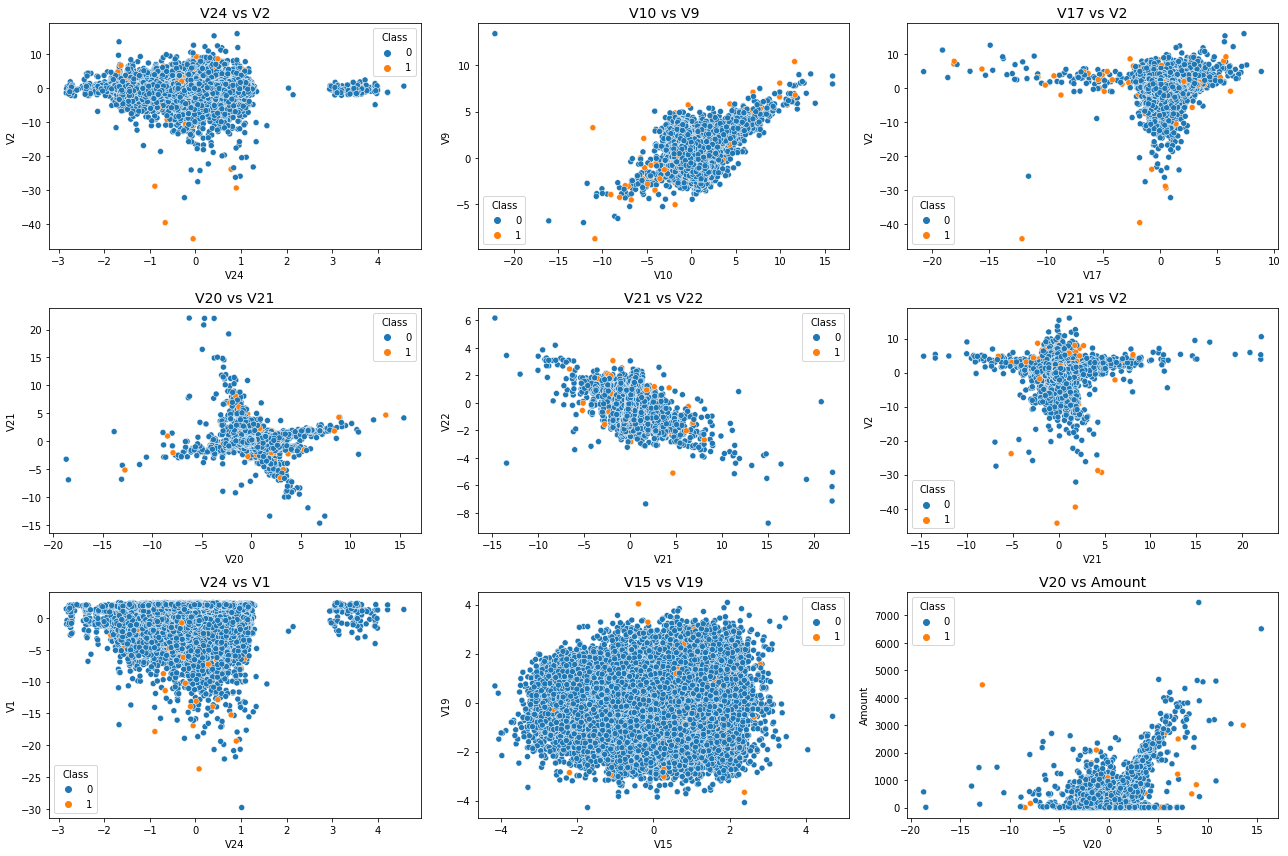

In [15]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))

sns.scatterplot(data=train, x='V24', y='V2', hue=train.Class, ax=axes[0, 0])
axes[0, 0].set_title('V24 vs V2', fontsize=14)

sns.scatterplot(data=train, x='V10', y='V9', hue=train.Class, ax=axes[0, 1])
axes[0, 1].set_title('V10 vs V9', fontsize=14)

sns.scatterplot(data=train, x='V17', y='V2', hue=train.Class, ax=axes[0, 2])
axes[0, 2].set_title('V17 vs V2', fontsize=14)

sns.scatterplot(data=train, x='V20', y='V21', hue=train.Class, ax=axes[1, 0])
axes[1, 0].set_title('V20 vs V21', fontsize=14)

sns.scatterplot(data=train, x='V21', y='V22', hue=train.Class, ax=axes[1, 1])
axes[1, 1].set_title('V21 vs V22', fontsize=14)

sns.scatterplot(data=train, x='V21', y='V2', hue=train.Class, ax=axes[1, 2])
axes[1, 2].set_title('V21 vs V2', fontsize=14)

sns.scatterplot(data=train, x='V24', y='V1', hue=train.Class, ax=axes[2, 0])
axes[2, 0].set_title('V24 vs V1', fontsize=14)

sns.scatterplot(data=train, x='V15', y='V19', hue=train.Class, ax=axes[2, 1])
axes[2, 1].set_title('V15 vs V19', fontsize=14)

sns.scatterplot(data=train, x='V20', y='Amount',
                hue=train.Class, ax=axes[2, 2])
axes[2, 2].set_title('V20 vs Amount', fontsize=14)

fig.tight_layout()
plt.show()


We find:

-   Features such as `V9` and `V10`, `V21` and `V22` show some degree of correlation.
-   Whereas others are distributed in ramdom fashion.
-   `V15` and `V19` are totall random and doesn't show any patterns that can be useful for us.
-   There are small clusters, example in figure `V24 vs V1` where we don't find any samples of data with `Class 1`.


In [16]:
train.V20/(train.Amount + 1e-6)


0        -0.147964
1         0.000782
2        -0.007946
3        -0.340089
4        -0.203627
            ...   
219124   -0.000985
219125   -0.004856
219126   -0.214989
219127   -0.002170
219128    0.015379
Length: 219129, dtype: float64

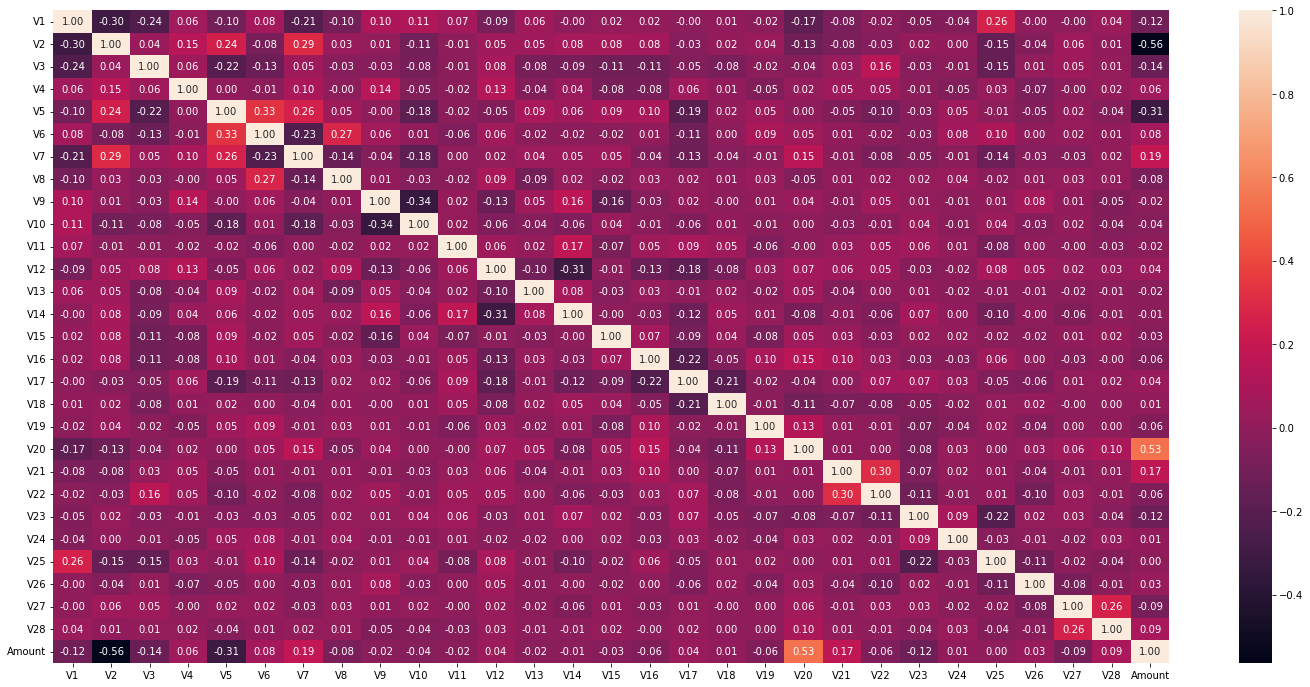

In [17]:
# Look at heatmap for correlation between different numeric features

corr = train[v_columns + ['Amount']].corr()
fig = plt.figure(figsize=(25, 12))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()


We find:

-   `V20` and `Amount` has the highest value of positive correlation, followed by `V5` and `V6`, followed by `V21` and `V22`
-   `V2` and `Amount` has the highest value of negative correlation, followed by `V5` and `Amount`, followed by `V12` and `V14`


## 4. Conclusion

Thank you for reading and I hope you found this notebook helpful. You can find my modeling notebook [here](https://www.kaggle.com/sagar118/pss3e4-ensemble-model "Credit Card Fraud Detection - Ensemble Model")

Any feedback is welcomed, I aim to learn and improve my skillset in my kaggle journey.

Upvote if you liked it, comment if you loved it. Hope to see you guys in the next one. Peace!
